# Lead Scoring - Case Study

Problem Statement

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

Goals of Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Step 1: Importing Libraries & Data

In [1123]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')

#import the useful libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns',  None)

In [1124]:
df = pd.read_csv(r'Leads.csv')
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

## Step 2: Inspecting the Dataframe

In [1125]:
df.shape

(9240, 37)

In [1126]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [1127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Step 3: Data Preparation

As can be seen,there are few columns with level called 'Select' which means that the customer had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we will convert 'Select' values to Nan

In [1128]:
# Replacing 'Select' value with Nan in the Dataset
df = df.replace('Select',np.nan)

In [1129]:
#Checking for count of missing values in each column
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [1130]:
# Checking the percentage of missing values
df_percent = round(100*(df.isnull().sum()/len(df.index)), 2)
df_percent

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [1131]:
#dropping Lead Number and Prospect ID.
df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

#### Dropping columns with more than 40% null values present in it.

In [1132]:
df_percent_40 = df_percent[df_percent > 40]
df_percent_40

How did you hear about X Education    78.46
Lead Quality                          51.59
Lead Profile                          74.19
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Score            45.65
dtype: float64

In [1133]:
df_percent_40.index

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [1134]:
df.drop(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
       axis=1, inplace=True)

In [1135]:
# Check and drop values with single unique numbers. 
df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

In [1136]:
# Let's Drop unique valued columns
df.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
         'Get updates on DM Content','I agree to pay the amount through cheque'], axis=1, inplace=True)

In [1137]:
df.shape

(9240, 23)

In [1138]:
# Checking the percentage of missing values again
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

There is a huge value of null variables in 4 columns as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with 'not provided'. This way we have all the data and almost no null values. In case these come up in the model, it will be of no use and we can drop it off then

In [1139]:
df['Country'] = df['Country'].fillna('not provided')
df['Specialization'] = df['Specialization'].fillna('not provided') 
df['What is your current occupation'] = df['What is your current occupation'].fillna('not provided')
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('not provided')

In [1140]:
# Rechecking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [1141]:
df['Tags'].value_counts(normalize=True, dropna=False)

Tags
NaN                                                  0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
num

In [1142]:
#replacing Nan values with "not provided"
df['Tags'] = df['Tags'].replace(np.nan,'not provided')

In [1143]:
df['City'].value_counts(normalize=True, dropna=False)

City
NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: proportion, dtype: float64

In [1144]:
#replacing Nan values with "not provided"
df['City'] = df['City'].replace(np.nan,'not provided')

In [1145]:
# Rechecking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

Imputing columns having missing values less than 2% with mode values of the respective columns

In [1146]:
mode_cols = ['Lead Source','TotalVisits','Page Views Per Visit','Last Activity']
for i in mode_cols:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [1147]:
# Rechecking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [1148]:
df['Country'].value_counts(normalize=True, dropna=False)

Country
India                   0.702597
not provided            0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Philippines             0.000216
Uganda                  0.000216
Italy                   0.000216
Bangladesh              0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
China                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Kenya                   0.000108
Sr

In [1149]:
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df['Country'] = df.apply(lambda x:slots(x['Country']), axis = 1)
df['Country'].value_counts()

Country
India            6492
not provided     2461
outside india     287
Name: count, dtype: int64

### EDA -->>

### Univariate analysis -->

#### Categorical columns --

In [1150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [1151]:
df_cat = df.select_dtypes(include=['object']).columns.tolist() 
df_cat

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [1152]:
for i in df_cat:
    print(f'-----------{i}------------')
    print(df[i].value_counts())
    print('-----------------------------------')

-----------Lead Origin------------
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
-----------------------------------
-----------Lead Source------------
Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
-----------------------------------
-----------Do Not Email------------
Do Not Email
No     8506
Yes     734
Nam

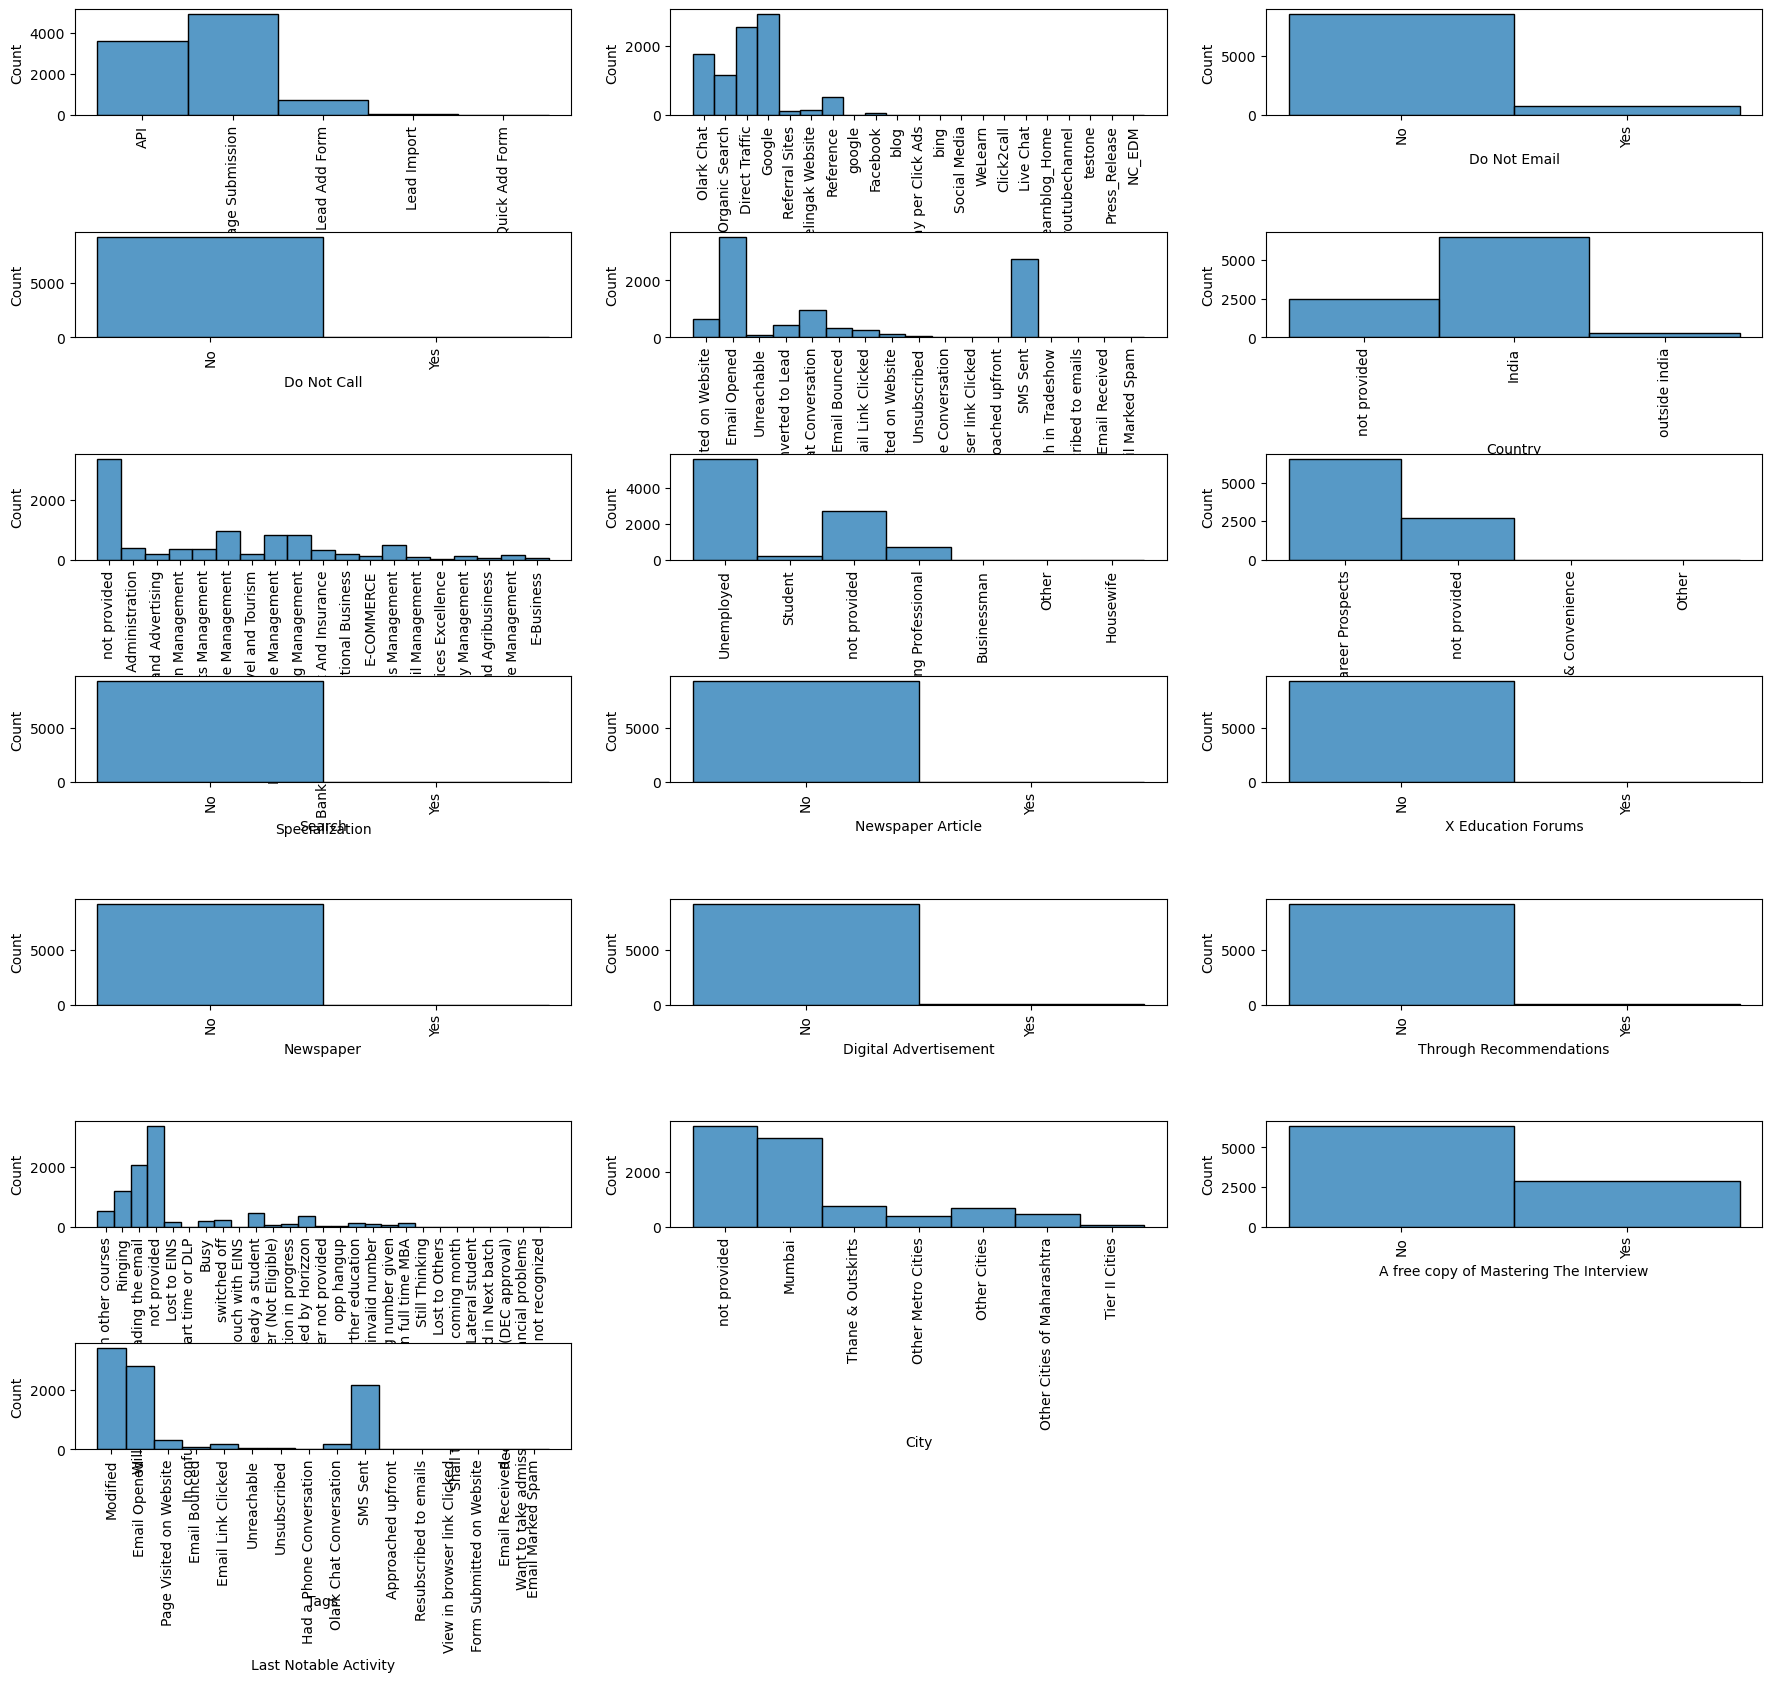

In [1153]:
plt.figure(figsize=(25,18))
for i,j in zip(df_cat,range(len(df_cat))): 
    plt.subplot(7,3,j+1) 
    sns.histplot(df[i])
    plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9, hspace=1.1)
plt.show()

#### Observations --

1. We can drop 'What matters most to you in choosing a course' column cause this column's spread of variance is very low.
2. Dropping 'Last Activity','Last Notable Activity' as this is a X-education's sales team generated data.

In [1154]:
df.drop(['What matters most to you in choosing a course','Last Activity','Last Notable Activity'], axis=1, inplace=True)

#### Numerical columns --

In [1155]:
df_num = df.select_dtypes(include=['int64','float64']).columns.tolist() 
df_num

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

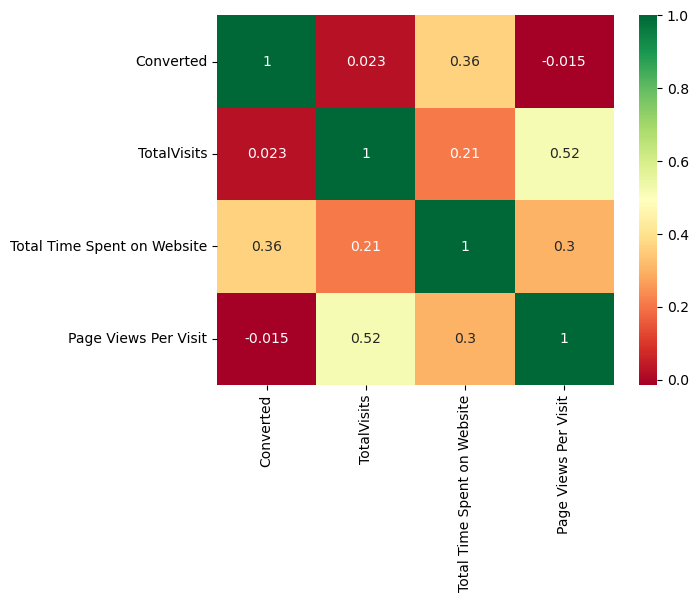

In [1156]:
sns.heatmap(data= df[df_num].corr(), cmap='RdYlGn',annot=True)
plt.show()

#### Observations --

1. 'Total Time Spent on Website' variable has stronger relationship with target variable than others.

#### Ratio of data imbalance

In [1157]:
df['Converted'].value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

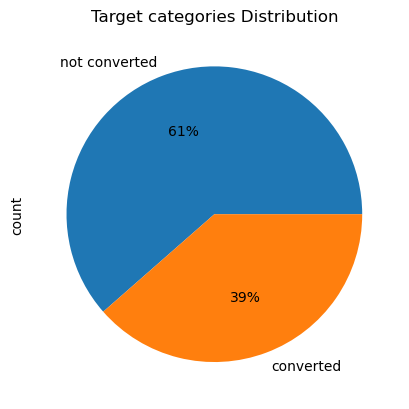

In [1158]:
df['Converted'].value_counts().plot.pie(labels=['not converted','converted'],autopct='%1.0f%%') # autopct='%1.0f%%' -- source- stack overflow
plt.title('Target categories Distribution')
plt.show()

Around 5700 people(61%) who visited X education site haven't join any course whereas around 3500 people(39%) have got converted to leads by joining any course from X education.

### Bivariate analysis -->

#### Categorical columns --

In [1159]:
df_cat = df.select_dtypes(include=['object']).columns.tolist() 
df_cat

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Country',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'City',
 'A free copy of Mastering The Interview']

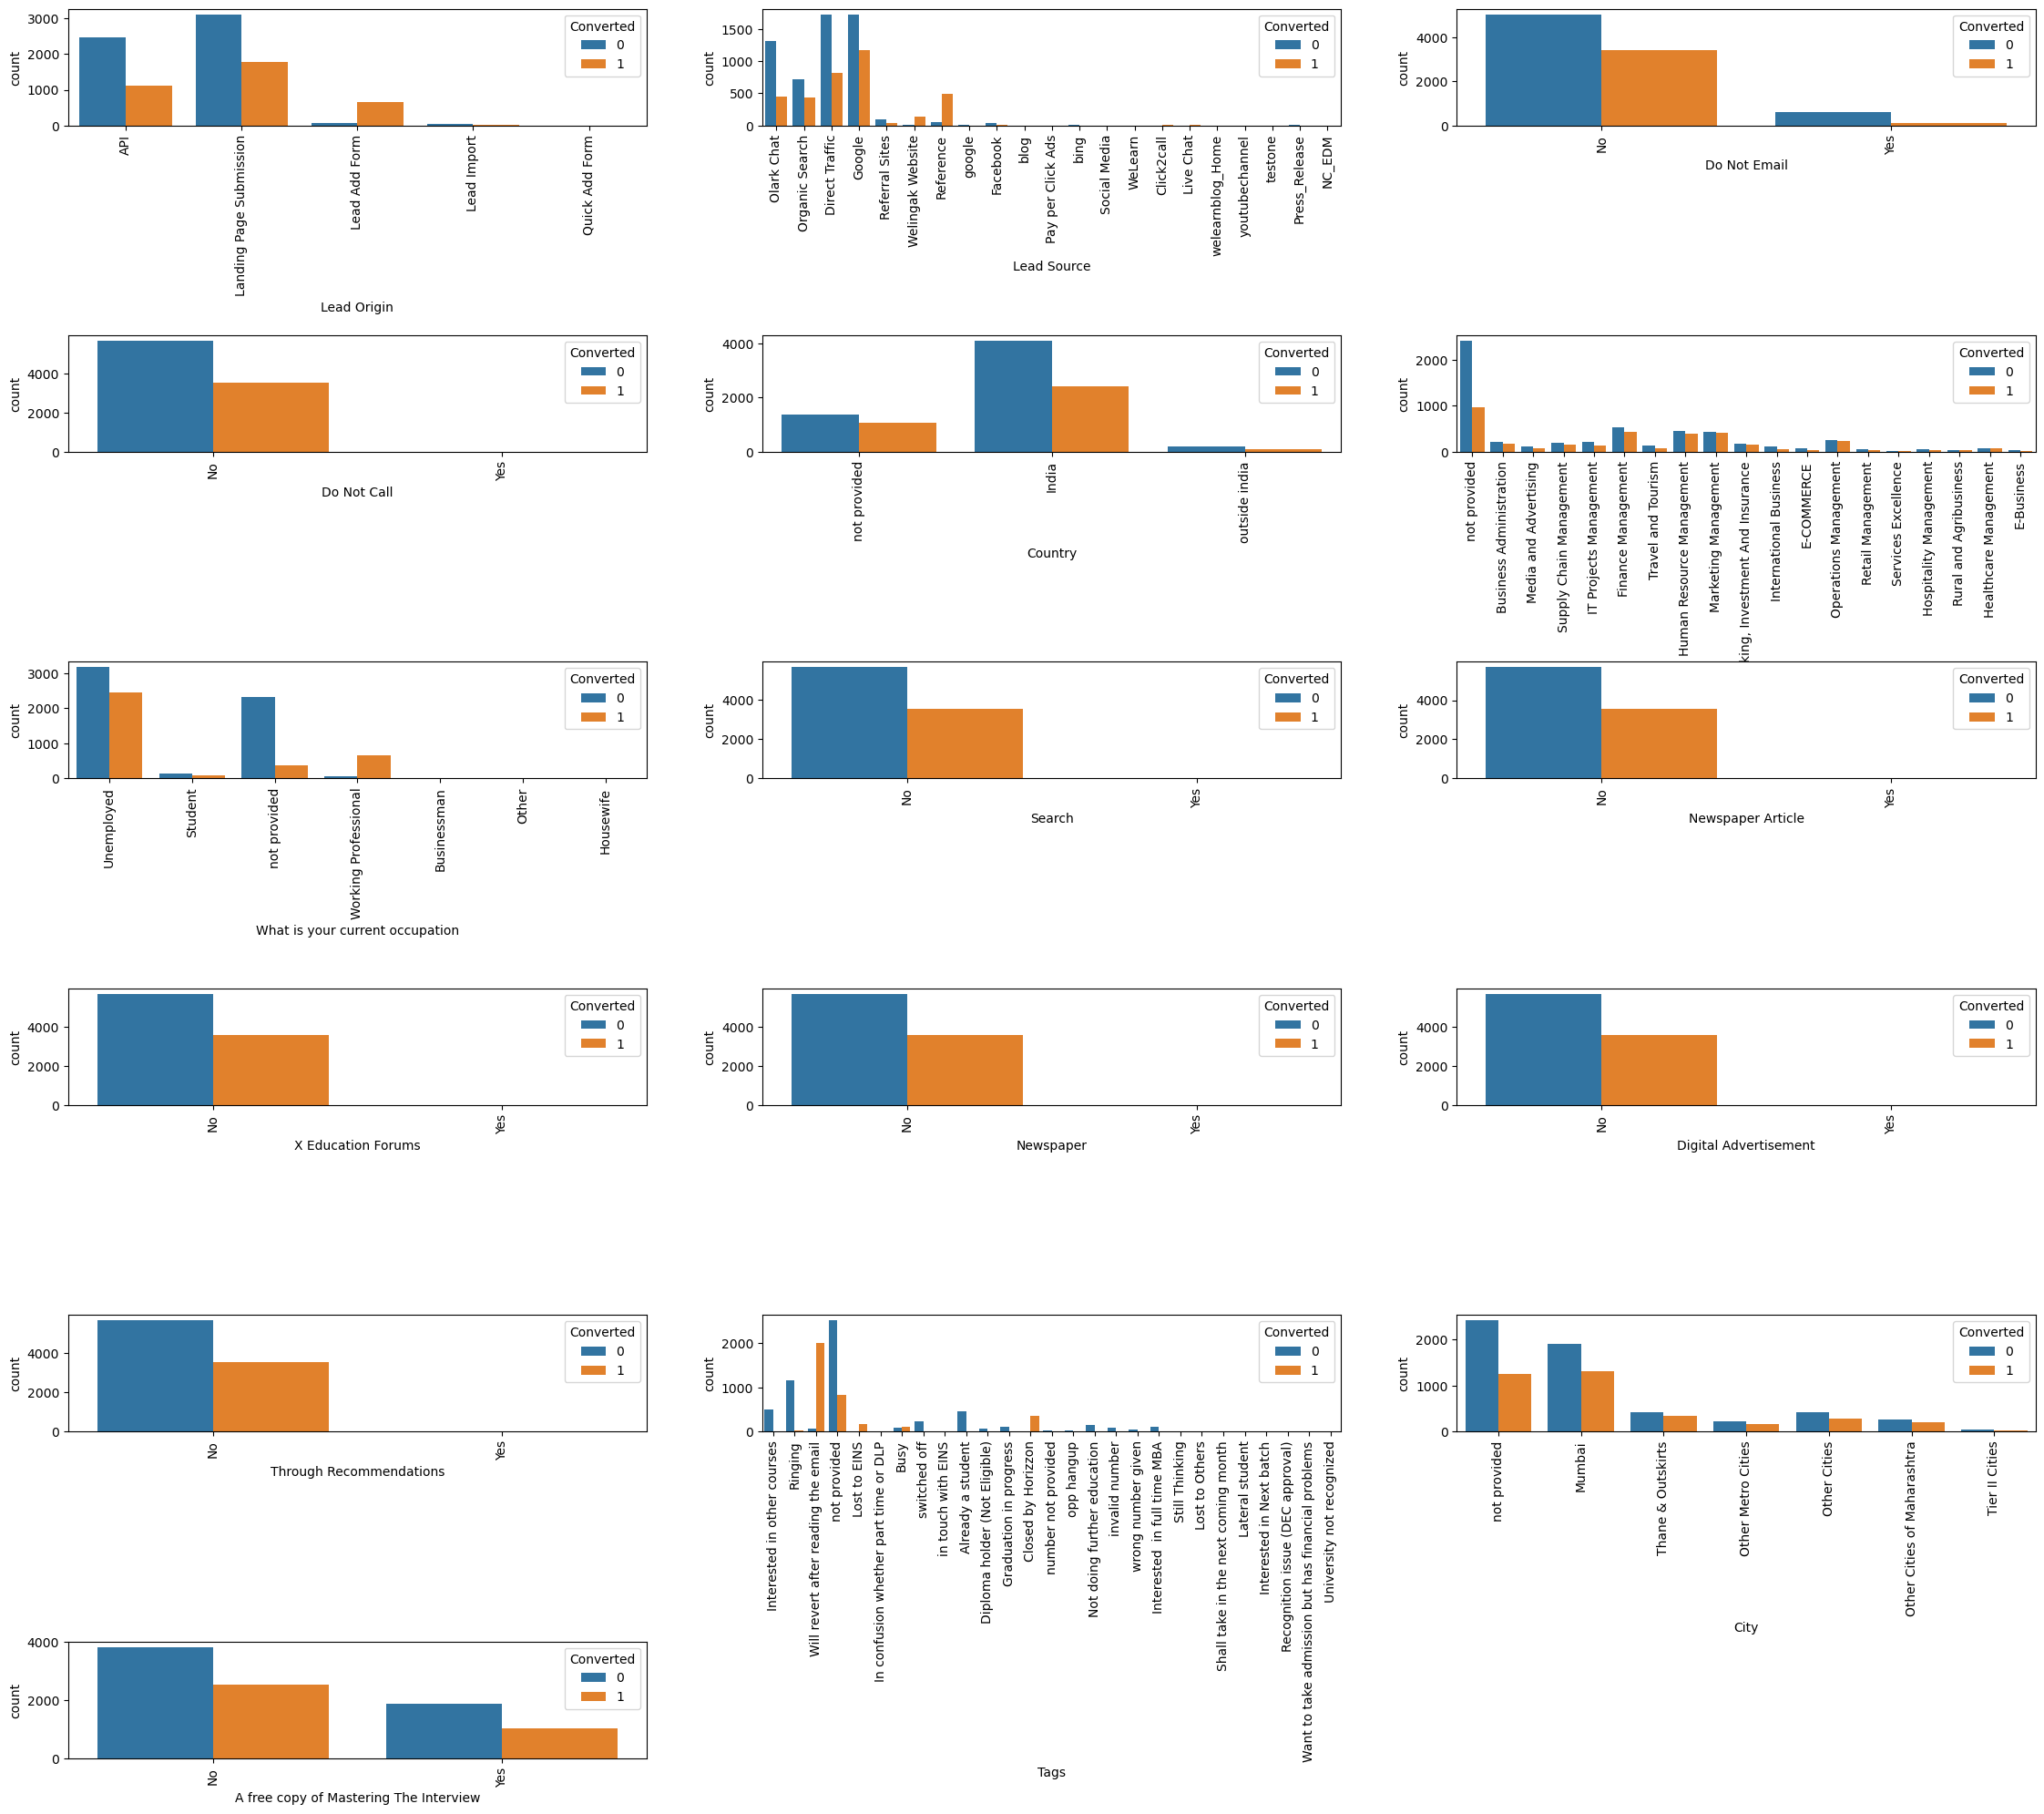

In [1160]:
plt.figure(figsize=(32,24))
for i,j in zip(df_cat,range(len(df_cat))): 
    plt.subplot(6,3,j+1) 
    sns.countplot(data=df, x=df[i], hue=df['Converted']) 
    plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9, hspace=1.8)
plt.show()

1. We can drop the 'Do Not Call' column as the data is highly skewed.
2. We can drop following imbalanced variables 'Search','Newspaper Article','X Education Forums','Newspaper',
'Digital Advertisement','Through Recommendations'.

In [1161]:
df.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper',
'Digital Advertisement','Through Recommendations'], axis=1, inplace=True)

#### Numerical columns --

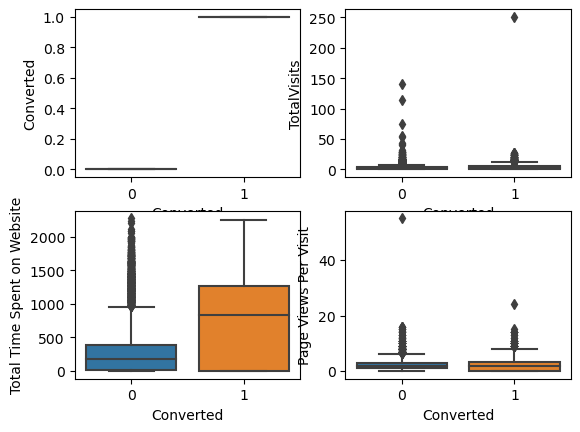

In [1162]:
for i,j in zip(df_num,range(len(df_num))): 
    plt.subplot(2,2,j+1) 
    sns.boxplot(data=df, x=df['Converted'], y=df[i]) 
plt.show()

### Dummy variables -->>

In [1163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Country                                 9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

In [1164]:
# Creating dummy variables using the 'get_dummies' for categorical columns
dummy = pd.get_dummies(df[['Lead Origin','Lead Source', 'Do Not Email', 'Country', 'Specialization', 
                           'What is your current occupation','Tags', 'City', 'A free copy of Mastering The Interview']], drop_first=True, dtype=int)
# Adding the results to the master dataframe
dummy_df = pd.concat([df, dummy], axis=1)
dummy_df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

        Country           Specialization What is your current occupation  \
0  not provided             not provided                      Unemployed   
1         India             not provided                      Unemployed   
2         India  Business Administration                         Student   
3         India    Media and Advertising                      Unemployed   
4         India             not provided                      Unemployed   

                                  Tags          City  \
0          Interested in other courses  not provided   
1                              Ringing  not provided   
2  Will revert after reading the email        Mumbai   
3                              Ringing        Mumbai   
4  Will revert after reading the email        Mumbai   

  A free copy of Mastering The Interview  Lead Origin_Landing Page Submission  \
0                                     No                                    0   
1                                     No                                    0   
2                                    Yes                                    1   
3                                     No                                    1   
4                                     No                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Lead Origin_Quick Add Form  Lead Source_Direct Traffic  \
0                           0                           0   
1                           0                           0   
2                           0                           1   
3                           0                           1   
4                           0                           0   

   Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
0                     0                   0                      0   
1                     0                   0                      0   
2                     0                   0                      0   
3                     0                   0                      0   
4                     0                   1                      0   

   Lead Source_NC_EDM  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   0                       0                           0   

   Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                    

In [1165]:
df_final = dummy_df.drop(['Lead Origin','Lead Source', 'Do Not Email', 'Country', 'Specialization', 'What is your current occupation',
               'Tags', 'City', 'A free copy of Mastering The Interview'], axis=1)
df_final.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                             0                 0                 0   
1                             0                 0                 0   
2                             0                 0                 0   
3                             0                 0                 0   
4                             0                 0                 0   

   Lead Source_google  Lead Source_testone  Lead Source_welearnblog_Home  \
0                   0                    0                             0   
1                   0                    0                             0   
2                   0 

In [1166]:
df_final.shape

(9240, 88)

## Step 4: Train-Test Split

In [1167]:
# Importing libraries
from sklearn.model_selection import train_test_split

In [1168]:
y = df_final.pop('Converted')
X = df_final

In [1169]:
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                             0                 0                 0   
1                             0                 0                 0   
2                             0                 0                 0   
3                             0                 0                 0   
4                             0                 0                 0   

   Lead Source_google  Lead Source_testone  Lead Source_welearnblog_Home  \
0                   0                    0                             0   
1                   0                    0                             0   
2                   0                    0                             0   
3           

In [1170]:
X.shape

(9240, 87)

In [1171]:
# Putting the target variable in y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1172]:
# Splitting the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

## Step 5: Feature Scaling

In [1173]:
# Importing libraries
from sklearn.preprocessing import MinMaxScaler

In [1174]:
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3112     0.007968                     0.182867              0.083333   
8413     0.019920                     0.679538              0.208333   
2961     0.011952                     0.553928              0.041667   
24       0.023904                     0.504660              0.062500   
2740     0.011952                     0.445184              0.125000   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3112                                    1                          0   
8413                                    1                          0   
2961                                    0                          1   
24                                      0                          0   
2740                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
3112                        0                           0   
8413                        0                           0   
2961                        0                           0   
24                          0                           0   
2740                        0                           0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
3112                           1                     0                   0   
8413                           0                     0                   0   
2961                           0                     0                   0   
24                             0                     0                   1   
2740                           0                     0                   0   

      Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
3112                      0                   0                       0   
8413                      0                   0                       0   
2961                      0                   0                       0   
24                        0                   0                       0   
2740                      0                   0                       0   

      Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
3112                           0                              0   
8413                           1                              0   
2961                           0                              0   
24                             0                              0   
2740                           1                              0   

      Lead Source_Press_Release  Lead Source_Reference  \
3112                          0                      0   
8413                          0                      0   
2961                          0                      1   
24                            0                      0   
2740                          0                      0   

      Lead Source_Referral Sites  Lead Source_Social Media  \
3112                           0                         0   
8413                           0                         0   
2961                           0                         0   
24                             0                         0   
2740                           0                         0   

      Lead Source_WeLearn  Lead Source_Welingak Website  Lead Source_bing  \
3112                    0                             0                 0   
8413                    0                             0                 0   
2961                    0                             0                 0   
24                      0                             0                 0   
2740                    0                             0                 0   

      Lead Source_blog  Lead Source_google  Lead Source_testone  \
3112                 0                   0                    0   
8413                 0                   0                    0   
2961                 0                   0                    0 

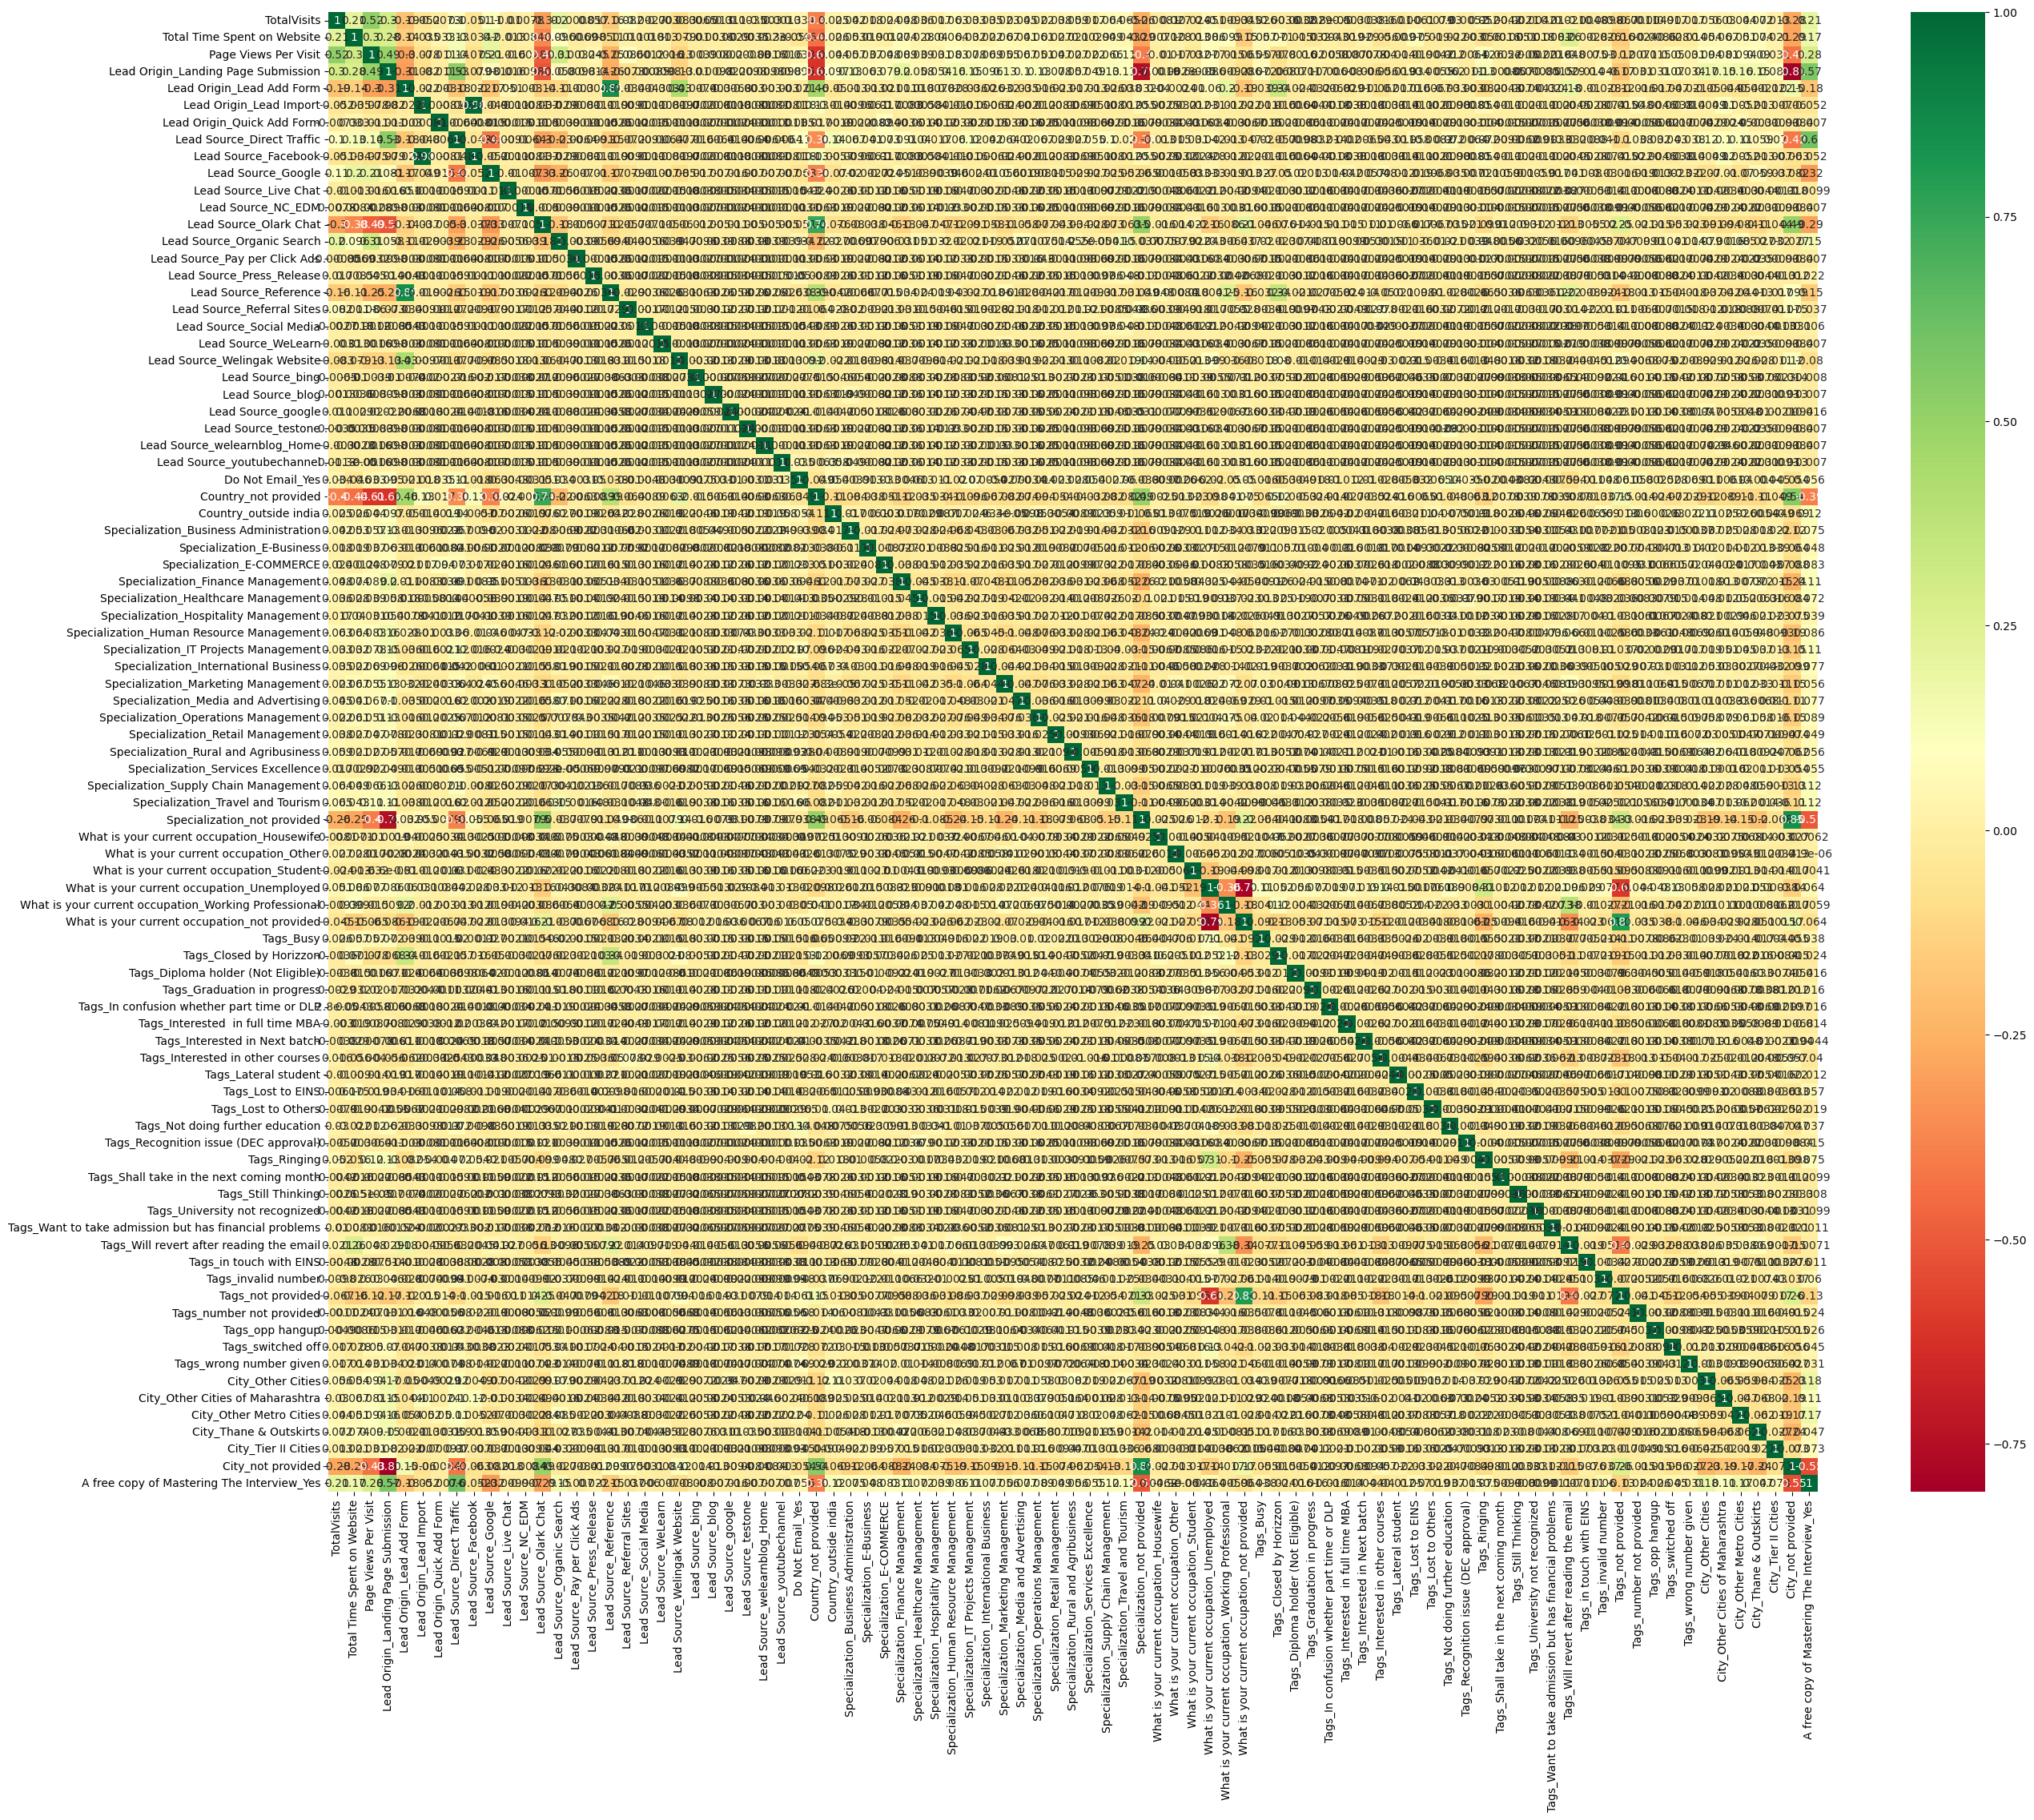

In [1175]:
# Checking correlation matrices
plt.figure(figsize=(30,24))
sns.heatmap(data= df_final.corr(), cmap='RdYlGn',annot=True)
plt.show()

Since there are a lot of variables it is difficult to drop variable. We'll do it after RFE

## Step 6: Model Building

In [1176]:
# Importing 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# Importing RFE
from sklearn.feature_selection import RFE

In [1177]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [1178]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 45),
 ('Lead Origin_Landing Page Submission', False, 40),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 32),
 ('Lead Origin_Quick Add Form', False, 73),
 ('Lead Source_Direct Traffic', False, 54),
 ('Lead Source_Facebook', False, 15),
 ('Lead Source_Google', False, 34),
 ('Lead Source_Live Chat', False, 63),
 ('Lead Source_NC_EDM', False, 13),
 ('Lead Source_Olark Chat', False, 44),
 ('Lead Source_Organic Search', False, 33),
 ('Lead Source_Pay per Click Ads', False, 71),
 ('Lead Source_Press_Release', False, 55),
 ('Lead Source_Reference', False, 21),
 ('Lead Source_Referral Sites', False, 50),
 ('Lead Source_Social Media', False, 69),
 ('Lead Source_WeLearn', False, 70),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 25),
 ('Lead Source_blog', False, 42),
 ('Lead Source_google', False, 19),
 ('Lead Source_testone', False, 66

In [1179]:
# Putting all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'What is your current occupation_not provided', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Shall take in the next coming month',
       'Tags_Will revert after reading the email', 'Tags_not provided',
       'Tags_switched off'],
      dtype='object')

#### Model 1

In [1180]:
# Importing statsmodels
import statsmodels.api as sm

In [1181]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1356.7
Date:                Sun, 14 Jan 2024   Deviance:                       2713.5
Time:                        20:08:50   Pearson chi2:                 7.38e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.6002
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -4.4859      0.204    -21.995      0.000      -4.886      -4.086
Total Time Spent on Website                      3.8903      0.212     18.316      0.000       3.474       4.307
Lead Origin_Lead Add Form                        1.3639      0.334      4.083      0.000       0.709       2.019
Lead Source_Welingak Website                     3.0970      1.067      2.903      0.004       1.006       5.188
Do Not Email_Yes                                -1.5369      0.225     -6.822      0.000      -1.978      -1.095
What is your current occupation_not provided    -2.5763      0.135    -19.076      0.000      -2.841      -2.312
Tags_Busy                                        3.6496      0.272     13.419      0.000       3.117       4.183
Tags_Closed by Horizzon                          7.8851      0.748     10.541      0.000       6.419       9.351
Tags_Interested in Next batch                   25.9990    2.2e+04      0.001      0.999   -4.31e+04    4.32e+04
Tags_Lateral student                            26.3650   2.72e+04      0.001      0.999   -5.32e+04    5.33e+04
Tags_Lost to EINS                                8.1363      0.604     13.460      0.000       6.952       9.321
Tags_Ringing                                    -0.3020      0.297     -1.016      0.310      -0.885       0.281
Tags_Shall take in the next coming month        27.0519   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Tags_Will revert after reading the email         6.8571      0.248     27.646      0.000       6.371       7.343
Tags_not provided                                4.4001      0.222     19.808      0.000       3.965       4.836
Tags_switched off                               -1.6276      1.027     -1.585      0.113      -3.641       0.385
================================================================================================================
"""

In [1182]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1183]:
# Making a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
13                             Tags_not provided  4.96
4   What is your current occupation_not provided  4.55
0                    Total Time Spent on Website  1.96
12      Tags_Will revert after reading the email  1.74
1                      Lead Origin_Lead Add Form  1.72
2                   Lead Source_Welingak Website  1.33
6                        Tags_Closed by Horizzon  1.33
10                                  Tags_Ringing  1.09
9                              Tags_Lost to EINS  1.08
3                               Do Not Email_Yes  1.07
5                                      Tags_Busy  1.04
14                             Tags_switched off  1.02
7                  Tags_Interested in Next batch  1.00
8                           Tags_Lateral student  1.00
11      Tags_Shall take in the next coming month  1.00

In [1184]:
# Dropping column with high p-value
col = col.drop(['Tags_Shall take in the next coming month'], 1)

#### Model 2

In [1185]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1361.2
Date:                Sun, 14 Jan 2024   Deviance:                       2722.4
Time:                        20:08:51   Pearson chi2:                 7.40e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.5996
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -4.4453      0.201    -22.104      0.000      -4.839      -4.051
Total Time Spent on Website                      3.8734      0.212     18.283      0.000       3.458       4.289
Lead Origin_Lead Add Form                        1.3597      0.334      4.075      0.000       0.706       2.014
Lead Source_Welingak Website                     3.0986      1.067      2.904      0.004       1.008       5.190
Do Not Email_Yes                                -1.5369      0.225     -6.830      0.000      -1.978      -1.096
What is your current occupation_not provided    -2.5744      0.135    -19.079      0.000      -2.839      -2.310
Tags_Busy                                        3.6135      0.270     13.388      0.000       3.084       4.143
Tags_Closed by Horizzon                          7.8483      0.747     10.502      0.000       6.384       9.313
Tags_Interested in Next batch                   25.9647    2.2e+04      0.001      0.999   -4.31e+04    4.32e+04
Tags_Lateral student                            26.3264   2.72e+04      0.001      0.999   -5.32e+04    5.33e+04
Tags_Lost to EINS                                8.0978      0.603     13.422      0.000       6.915       9.280
Tags_Ringing                                    -0.3357      0.296     -1.135      0.256      -0.915       0.244
Tags_Will revert after reading the email         6.8198      0.246     27.747      0.000       6.338       7.302
Tags_not provided                                4.3623      0.220     19.864      0.000       3.932       4.793
Tags_switched off                               -1.6609      1.026     -1.618      0.106      -3.673       0.351
================================================================================================================
"""

In [1186]:
# Making a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12                             Tags_not provided  4.96
4   What is your current occupation_not provided  4.55
0                    Total Time Spent on Website  1.96
11      Tags_Will revert after reading the email  1.74
1                      Lead Origin_Lead Add Form  1.72
2                   Lead Source_Welingak Website  1.33
6                        Tags_Closed by Horizzon  1.33
10                                  Tags_Ringing  1.09
9                              Tags_Lost to EINS  1.08
3                               Do Not Email_Yes  1.07
5                                      Tags_Busy  1.04
13                             Tags_switched off  1.02
7                  Tags_Interested in Next batch  1.00
8                           Tags_Lateral student  1.00

In [1187]:
# Dropping column with high p-value
col = col.drop(['Tags_Interested in Next batch'], 1)

#### Model 3

In [1188]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1372.7
Date:                Sun, 14 Jan 2024   Deviance:                       2745.4
Time:                        20:08:52   Pearson chi2:                 7.43e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.5982
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -4.3345      0.192    -22.579      0.000      -4.711      -3.958
Total Time Spent on Website                      3.8817      0.211     18.438      0.000       3.469       4.294
Lead Origin_Lead Add Form                        1.4540      0.339      4.295      0.000       0.790       2.118
Lead Source_Welingak Website                     3.0020      1.068      2.810      0.005       0.908       5.096
Do Not Email_Yes                                -1.5014      0.224     -6.715      0.000      -1.940      -1.063
What is your current occupation_not provided    -2.5711      0.135    -19.063      0.000      -2.835      -2.307
Tags_Busy                                        3.4989      0.263     13.286      0.000       2.983       4.015
Tags_Closed by Horizzon                          7.7029      0.744     10.349      0.000       6.244       9.162
Tags_Lateral student                            25.1968   1.64e+04      0.002      0.999   -3.22e+04    3.23e+04
Tags_Lost to EINS                                7.9762      0.600     13.298      0.000       6.801       9.152
Tags_Ringing                                    -0.4535      0.290     -1.565      0.117      -1.021       0.114
Tags_Will revert after reading the email         6.6912      0.238     28.138      0.000       6.225       7.157
Tags_not provided                                4.2445      0.211     20.082      0.000       3.830       4.659
Tags_switched off                               -1.7767      1.025     -1.734      0.083      -3.785       0.232
================================================================================================================
"""

In [1189]:
# Making a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11                             Tags_not provided  4.96
4   What is your current occupation_not provided  4.55
0                    Total Time Spent on Website  1.96
10      Tags_Will revert after reading the email  1.74
1                      Lead Origin_Lead Add Form  1.72
2                   Lead Source_Welingak Website  1.33
6                        Tags_Closed by Horizzon  1.33
9                                   Tags_Ringing  1.09
8                              Tags_Lost to EINS  1.08
3                               Do Not Email_Yes  1.07
5                                      Tags_Busy  1.04
12                             Tags_switched off  1.02
7                           Tags_Lateral student  1.00

In [1190]:
# Dropping column with high p-value
col = col.drop(['Tags_Lateral student'], 1)

#### Model 4

In [1191]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1383.1
Date:                Sun, 14 Jan 2024   Deviance:                       2766.2
Time:                        20:08:52   Pearson chi2:                 7.47e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5969
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -4.2407      0.185    -22.862      0.000      -4.604      -3.877
Total Time Spent on Website                      3.8540      0.209     18.417      0.000       3.444       4.264
Lead Origin_Lead Add Form                        1.5519      0.343      4.520      0.000       0.879       2.225
Lead Source_Welingak Website                     2.9044      1.070      2.715      0.007       0.808       5.001
Do Not Email_Yes                                -1.5114      0.224     -6.755      0.000      -1.950      -1.073
What is your current occupation_not provided    -2.5657      0.135    -19.047      0.000      -2.830      -2.302
Tags_Busy                                        3.4129      0.259     13.183      0.000       2.905       3.920
Tags_Closed by Horizzon                          7.5833      0.742     10.218      0.000       6.129       9.038
Tags_Lost to EINS                                7.8835      0.598     13.187      0.000       6.712       9.055
Tags_Ringing                                    -0.5397      0.286     -1.888      0.059      -1.100       0.021
Tags_Will revert after reading the email         6.5901      0.232     28.382      0.000       6.135       7.045
Tags_not provided                                4.1534      0.206     20.191      0.000       3.750       4.557
Tags_switched off                               -1.8582      1.024     -1.815      0.069      -3.864       0.148
================================================================================================================
"""

In [1192]:
# Making a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10                             Tags_not provided  4.96
4   What is your current occupation_not provided  4.55
0                    Total Time Spent on Website  1.96
9       Tags_Will revert after reading the email  1.74
1                      Lead Origin_Lead Add Form  1.72
2                   Lead Source_Welingak Website  1.33
6                        Tags_Closed by Horizzon  1.33
8                                   Tags_Ringing  1.09
7                              Tags_Lost to EINS  1.08
3                               Do Not Email_Yes  1.07
5                                      Tags_Busy  1.04
11                             Tags_switched off  1.02

In [1193]:
# Dropping column with high p-value
col = col.drop(['Tags_switched off'], 1)

#### Model 5

In [1194]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1386.1
Date:                Sun, 14 Jan 2024   Deviance:                       2772.2
Time:                        20:08:53   Pearson chi2:                 7.58e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5966
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -4.3645      0.183    -23.807      0.000      -4.724      -4.005
Total Time Spent on Website                      3.8485      0.209     18.409      0.000       3.439       4.258
Lead Origin_Lead Add Form                        1.5605      0.345      4.520      0.000       0.884       2.237
Lead Source_Welingak Website                     2.8958      1.070      2.705      0.007       0.798       4.994
Do Not Email_Yes                                -1.5141      0.224     -6.772      0.000      -1.952      -1.076
What is your current occupation_not provided    -2.5648      0.135    -19.043      0.000      -2.829      -2.301
Tags_Busy                                        3.5382      0.257     13.764      0.000       3.034       4.042
Tags_Closed by Horizzon                          7.7055      0.742     10.390      0.000       6.252       9.159
Tags_Lost to EINS                                8.0079      0.597     13.411      0.000       6.838       9.178
Tags_Ringing                                    -0.4140      0.284     -1.457      0.145      -0.971       0.143
Tags_Will revert after reading the email         6.7140      0.230     29.142      0.000       6.262       7.166
Tags_not provided                                4.2779      0.204     21.011      0.000       3.879       4.677
================================================================================================================
"""

In [1195]:
# Making a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10                             Tags_not provided  4.95
4   What is your current occupation_not provided  4.55
0                    Total Time Spent on Website  1.93
9       Tags_Will revert after reading the email  1.73
1                      Lead Origin_Lead Add Form  1.72
2                   Lead Source_Welingak Website  1.33
6                        Tags_Closed by Horizzon  1.33
8                                   Tags_Ringing  1.09
7                              Tags_Lost to EINS  1.08
3                               Do Not Email_Yes  1.07
5                                      Tags_Busy  1.04

In [1196]:
# Dropping column with high p-value
col = col.drop(['Tags_Ringing'], 1)

#### Model 6

In [1197]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1387.2
Date:                Sun, 14 Jan 2024   Deviance:                       2774.4
Time:                        20:08:53   Pearson chi2:                 7.57e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5964
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -4.5198      0.157    -28.750      0.000      -4.828      -4.212
Total Time Spent on Website                      3.8438      0.209     18.385      0.000       3.434       4.254
Lead Origin_Lead Add Form                        1.5445      0.342      4.513      0.000       0.874       2.215
Lead Source_Welingak Website                     2.9097      1.069      2.721      0.007       0.814       5.006
Do Not Email_Yes                                -1.5074      0.224     -6.737      0.000      -1.946      -1.069
What is your current occupation_not provided    -2.5641      0.135    -19.042      0.000      -2.828      -2.300
Tags_Busy                                        3.6945      0.239     15.480      0.000       3.227       4.162
Tags_Closed by Horizzon                          7.8659      0.735     10.701      0.000       6.425       9.307
Tags_Lost to EINS                                8.1630      0.589     13.850      0.000       7.008       9.318
Tags_Will revert after reading the email         6.8715      0.209     32.826      0.000       6.461       7.282
Tags_not provided                                4.4336      0.180     24.607      0.000       4.080       4.787
================================================================================================================
"""

In [1198]:
# Making a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9                             Tags_not provided  4.93
4  What is your current occupation_not provided  4.54
0                   Total Time Spent on Website  1.79
1                     Lead Origin_Lead Add Form  1.70
8      Tags_Will revert after reading the email  1.68
2                  Lead Source_Welingak Website  1.33
6                       Tags_Closed by Horizzon  1.32
7                             Tags_Lost to EINS  1.08
3                              Do Not Email_Yes  1.06
5                                     Tags_Busy  1.03

#### Since the Model 6 seems to be stable with significant p-values, we shall go ahead with this model for further analysis

## Step 7: Predictions

In [1199]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3112    0.649459
8413    0.856517
2961    0.999107
24      0.986500
2740    0.056859
489     0.913066
9116    0.913066
4176    0.024921
8537    0.096319
6267    0.361366
dtype: float64

In [1200]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.64945922, 0.85651724, 0.99910673, 0.98649996, 0.056859  ,
       0.91306575, 0.91306575, 0.02492118, 0.09631907, 0.36136633])

In [1201]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          0         0.649459
1          1         0.856517
2          1         0.999107
3          1         0.986500
4          0         0.056859

In [1202]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          0         0.649459          1
1          1         0.856517          1
2          1         0.999107          1
3          1         0.986500          1
4          0         0.056859          0

## Step 8: Model Evaluation

In [1203]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [1204]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3784,  170],
       [ 393, 2121]], dtype=int64)

In [1205]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9129560915275201


In [1206]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [1207]:
# Calculating the sensitivity
TP/(TP+FN)

0.8436754176610979

In [1208]:
# Calculating the specificity
TN/(TN+FP)

0.9570055639858371

#### With the current cut off as 0.5 we have around 91% accuracy, sensitivity of around 84% and specificity of around 95%

## Step 9: ROC Curve

In [1209]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [1210]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

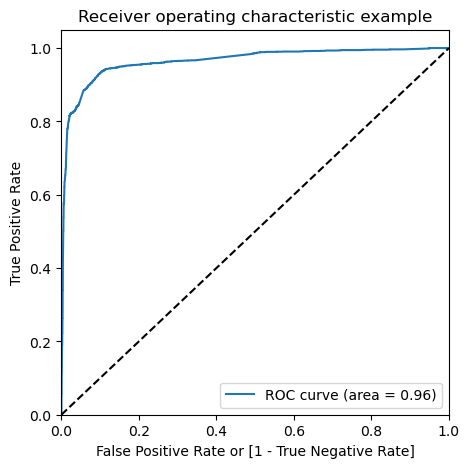

In [1211]:
# Calling the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [1212]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.649459          1    1    1    1    1    1    1    1   
1          1         0.856517          1    1    1    1    1    1    1    1   
2          1         0.999107          1    1    1    1    1    1    1    1   
3          1         0.986500          1    1    1    1    1    1    1    1   
4          0         0.056859          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    1    1    0  
2    1    1    1  
3    1    1    1  
4    0    0    0

In [1213]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

prob  accuracy     sensi     speci
0.0   0.0  0.388683  1.000000  0.000000
0.1   0.1  0.848330  0.956643  0.779464
0.2   0.2  0.908936  0.939539  0.889479
0.3   0.3  0.913884  0.923230  0.907941
0.4   0.4  0.917130  0.895386  0.930956
0.5   0.5  0.912956  0.843675  0.957006
0.6   0.6  0.912956  0.827765  0.967122
0.7   0.7  0.915275  0.816229  0.978250
0.8   0.8  0.910328  0.798329  0.981538
0.9   0.9  0.896413  0.755768  0.985837

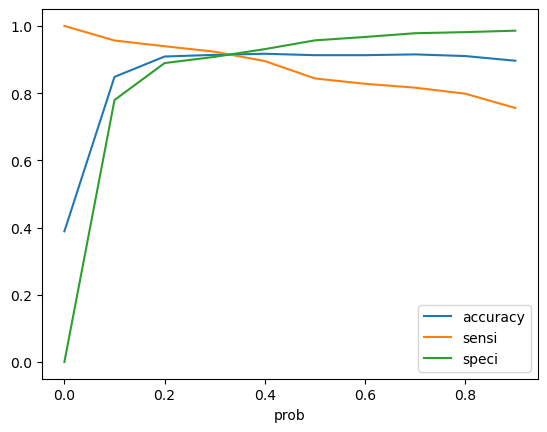

In [1214]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability

In [1215]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.649459          1    1    1    1    1    1    1    1   
1          1         0.856517          1    1    1    1    1    1    1    1   
2          1         0.999107          1    1    1    1    1    1    1    1   
3          1         0.986500          1    1    1    1    1    1    1    1   
4          0         0.056859          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                1  
1    1    1    0                1  
2    1    1    1                1  
3    1    1    1                1  
4    0    0    0                0

In [1216]:
# Checking the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9155844155844156

In [1217]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3642,  312],
       [ 234, 2280]], dtype=int64)

In [1218]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [1219]:
# Calculating the sensitivity
TP/(TP+FN)

0.9069212410501193

In [1220]:
# Calculating the specificity
TN/(TN+FP)

0.921092564491654

#### With the final cut off as 0.35 we have around 91% accuracy, sensitivity of around 90% and specificity of around 92%

## Step 10: Precision and Recall

In [1221]:
from sklearn.metrics import precision_score, recall_score

In [1222]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8796296296296297

In [1223]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9069212410501193

#### Precision recall treadoff

In [1224]:
from sklearn.metrics import precision_recall_curve

In [1225]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

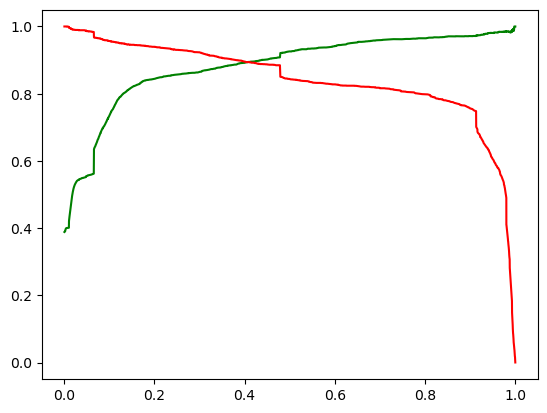

In [1226]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 11: Making predictions on the test set

In [1227]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_test = X_test[col]
X_test.head()

Total Time Spent on Website  Lead Origin_Lead Add Form  \
567                      0.147359                          0   
2303                     0.688859                          0   
1523                     0.596538                          0   
6923                     0.083000                          0   
7841                     0.311585                          0   

      Lead Source_Welingak Website  Do Not Email_Yes  \
567                              0                 0   
2303                             0                 0   
1523                             0                 0   
6923                             0                 0   
7841                             0                 0   

      What is your current occupation_not provided  Tags_Busy  \
567                                              0          0   
2303                                             0          0   
1523                                             0          0   
6923                                             0          0   
7841                                             0          0   

      Tags_Closed by Horizzon  Tags_Lost to EINS  \
567                         0                  0   
2303                        0                  0   
1523                        0                  0   
6923                        0                  0   
7841                        0                  0   

      Tags_Will revert after reading the email  Tags_not provided  
567                                          0                  0  
2303                                         0                  0  
1523                                         0                  0  
6923                                         0                  1  
7841                                         0                  0

In [1228]:
X_test_sm = sm.add_constant(X_test)

In [1229]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

Converted  Conversion_Prob
0          0         0.018828
1          0         0.133310
2          0         0.097364
3          0         0.557937
4          0         0.034818

In [1230]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

Converted  Conversion_Prob  final_predicted
0             0         0.018828                0
1             0         0.133310                0
2             0         0.097364                0
3             0         0.557937                1
4             0         0.034818                0
...         ...              ...              ...
2767          0         0.100063                0
2768          0         0.139950                0
2769          0         0.017995                0
2770          0         0.010773                0
2771          0         0.016856                0

[2772 rows x 3 columns]

In [1231]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.9166666666666666

In [1232]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion

array([[1583,  142],
       [  89,  958]], dtype=int64)

In [1233]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [1234]:
# Calculating the sensitivity
TP/(TP+FN)

0.9149952244508118

In [1235]:
# Calculating the specificity
TN/(TN+FP)

0.9176811594202898

#### With the cut off as 0.35 we have around 91% accuracy, sensitivity of around 91% and specificity of around 91% for test data

In [1236]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8709090909090909

In [1237]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9149952244508118

### Hence we can see that the final prediction of conversions have a target rate of 91% (same as predictions made on training data set)

## Step 12: Conclusion

1. While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
2. Accuracy, Sensitivity and Specificity values of test set are around 91%, 91% and 91% which are approximately closer to the respective values calculated using trained set.
3. Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 91%
Hence overall this model seems to be good.